In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('googleplaystore.csv')

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.columns = data.columns.str.replace(' ', '_')

In [5]:
print("Shape of data (samples, features): ",data.shape)
print("Data Types: \n", data.dtypes.value_counts())

Shape of data (samples, features):  (10841, 13)
Data Types: 
 object     12
float64     1
dtype: int64


In [6]:
data.Size.value_counts().head()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
Name: Size, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content_Rating    10840 non-null object
Genres            10841 non-null object
Last_Updated      10841 non-null object
Current_Ver       10833 non-null object
Android_Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
data.Size.value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
608k                     1
237k                     1
683k                     1
549k                     1
930k                     1
Name: Size, Length: 462, dtype: int64

In [9]:
data.Size=data.Size.str.replace('k','e+3')
data.Size=data.Size.str.replace('M','e+6')
data.Size.head()

0     19e+6
1     14e+6
2    8.7e+6
3     25e+6
4    2.8e+6
Name: Size, dtype: object

In [10]:
def is_convertable(v):
    try:
        float(v)
        return True
    except ValueError:
        return False
    
temp=data.Size.apply(lambda x: is_convertable(x))
temp.head()

0    True
1    True
2    True
3    True
4    True
Name: Size, dtype: bool

In [11]:
data.Size[~temp].value_counts()

Varies with device    1695
1,000+                   1
Name: Size, dtype: int64

In [12]:
data.Size=data.Size.replace('Varies with device',np.nan)
data.Size=data.Size.replace('1,000+',1000)

In [13]:
data.Size=pd.to_numeric(data.Size)

Text(0, 0.5, 'Frequency')

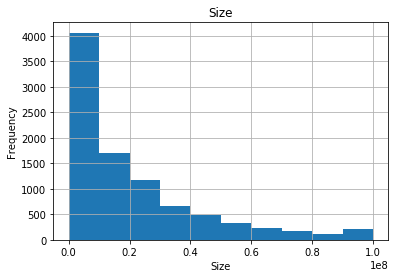

In [14]:
data.hist(column='Size')
plt.xlabel('Size')
plt.ylabel('Frequency')

In [15]:
#Installs
data.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Free                 1
0                    1
Name: Installs, dtype: int64

In [16]:
data.Installs=data.Installs.apply(lambda x: x.strip('+'))
data.Installs=data.Installs.apply(lambda x: x.replace(',',''))
data.Installs=data.Installs.replace('Free',np.nan)
data.Installs.value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

In [17]:
data.Installs.str.isnumeric().sum()

10840

Text(0, 0.5, 'Frequency')

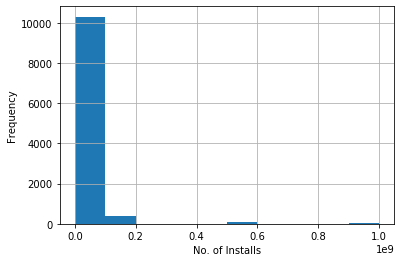

In [18]:
data.Installs=pd.to_numeric(data.Installs)
data.Installs.hist();
plt.xlabel('No. of Installs')
plt.ylabel('Frequency')

In [19]:
data.sort_values(by='Size',ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100000000.0,5000000.0,Free,0,Everyone,Sports,"July 20, 2018",3.04.1,4.0.3 and up
5427,Ultimate Tennis,SPORTS,4.3,183004,100000000.0,10000000.0,Free,0,Everyone,Sports,"July 19, 2018",2.29.3118,4.0.3 and up
1758,Hungry Shark Evolution,GAME,4.5,6074334,100000000.0,100000000.0,Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
7404,SimCity BuildIt,FAMILY,4.5,4218587,100000000.0,50000000.0,Free,0,Everyone 10+,Simulation,"June 19, 2018",1.23.3.75024,4.0 and up
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100000000.0,10000000.0,Free,0,Everyone,Lifestyle;Pretend Play,"July 16, 2018",9.0,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,NaN,100000.0,Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,NaN,1000.0,Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,NaN,100000.0,Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,NaN,5000000.0,Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


In [20]:
Topratingapp=data.loc[((data.Rating>4)),:]

In [21]:
Topratingapp

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000.0,50000.0,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000.0,1000.0,Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000.0,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100.0,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [22]:
pd.crosstab(data.Category,data.Rating>4)

Rating,False,True
Category,,
1.9,0,1
ART_AND_DESIGN,13,52
AUTO_AND_VEHICLES,39,46
BEAUTY,23,30
BOOKS_AND_REFERENCE,86,145
BUSINESS,255,205
COMICS,21,39
COMMUNICATION,148,239
DATING,122,112


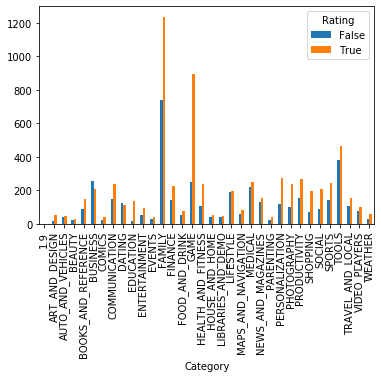

In [23]:
pd.crosstab(data.Category,data.Rating>4).plot(kind='bar')
plt.show()

In [24]:
data.App.value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Candy Crush Saga                                     7
Duolingo: Learn Languages Free                       7
ESPN                                                 7
                                                    ..
Online Chat Girls Meet                               1
Soccer Board Tactics                                 1
Elkhart County 4-H Fair                              1
Professor Online SEDUC-CE                            1
Ag PhD Deficiencies                                  1
Name: App, Length: 9660, dtype: int64

In [25]:
data.groupby('Genres').Rating.mean()

Genres
Action                                   4.285475
Action;Action & Adventure                4.311765
Adventure                                4.180822
Adventure;Action & Adventure             4.423077
Adventure;Brain Games                    4.600000
                                           ...   
Video Players & Editors                  4.063924
Video Players & Editors;Creativity       4.100000
Video Players & Editors;Music & Video    4.000000
Weather                                  4.244000
Word                                     4.410714
Name: Rating, Length: 120, dtype: float64

In [26]:
data.groupby('Category').agg({'Rating':{'Rating_mean':'mean','Rating_max':'max','Rating_min':'min'}})

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


Rating                      
                    Rating_mean Rating_max Rating_min
Category                                             
1.9                   19.000000       19.0       19.0
ART_AND_DESIGN         4.358065        5.0        3.2
AUTO_AND_VEHICLES      4.190411        4.9        2.1
BEAUTY                 4.278571        4.9        3.1
BOOKS_AND_REFERENCE    4.346067        5.0        2.7
BUSINESS               4.121452        5.0        1.0
COMICS                 4.155172        5.0        2.8
COMMUNICATION          4.158537        5.0        1.0
DATING                 3.970769        5.0        1.0
EDUCATION              4.389032        4.9        3.5
ENTERTAINMENT          4.126174        4.7        3.0
EVENTS                 4.435556        5.0        2.9
FAMILY                 4.192272        5.0        1.0
FINANCE                4.131889        5.0        1.0
FOOD_AND_DRINK         4.166972        5.0        1.7
GAME                   4.286326        5.0        1.0
HEALTH_AND_FITNESS     4.277104        5.0        1.4
HOUSE_AND_HOME         4.197368        4.8        2.8
LIBRARIES_AND_DEMO     4.178462        5.0        3.1
LIFESTYLE              4.094904        5.0        1.5
MAPS_AND_NAVIGATION    4.051613        4.9        1.9
MEDICAL                4.189143        5.0        1.0
NEWS_AND_MAGAZINES     4.132189        5.0        1.7
PARENTING              4.300000        5.0        2.0
PERSONALIZATION        4.335987        5.0        2.5
PHOTOGRAPHY            4.192114        5.0        2.0
PRODUCTIVITY           4.211396        5.0        1.0
SHOPPING               4.259664        5.0        1.6
SOCIAL                 4.255598        5.0        1.9
SPORTS                 4.223511        5.0        1.5
TOOLS                  4.047411        5.0        1.0
TRAVEL_AND_LOCAL       4.109292        5.0        2.2
VIDEO_PLAYERS          4.063750        4.9        1.8
WEATHER                4.244000        4.8        3.3

In [27]:
data['RatingState']=np.where(data['Rating']>4,'Toprating','down')

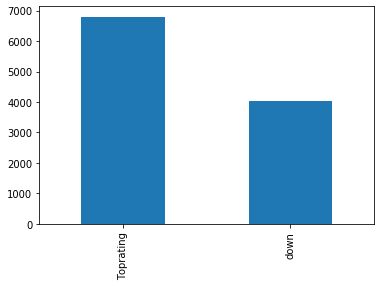

In [28]:
data['RatingState'].value_counts().plot(kind='bar')
plt.show()

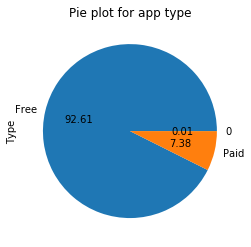

In [29]:
data["Type"].value_counts().plot(kind='pie',title='Pie plot for app type',autopct='%.2f')
plt.show()

In [30]:
data["Type"].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [31]:
data.groupby('Category')['Reviews'].count()

Category
1.9                       1
ART_AND_DESIGN           65
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     231
BUSINESS                460
COMICS                   60
COMMUNICATION           387
DATING                  234
EDUCATION               156
ENTERTAINMENT           149
EVENTS                   64
FAMILY                 1972
FINANCE                 366
FOOD_AND_DRINK          127
GAME                   1144
HEALTH_AND_FITNESS      341
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
LIFESTYLE               382
MAPS_AND_NAVIGATION     137
MEDICAL                 463
NEWS_AND_MAGAZINES      283
PARENTING                60
PERSONALIZATION         392
PHOTOGRAPHY             335
PRODUCTIVITY            424
SHOPPING                260
SOCIAL                  295
SPORTS                  384
TOOLS                   843
TRAVEL_AND_LOCAL        258
VIDEO_PLAYERS           175
WEATHER                  82
Name: Reviews, dtype: int64

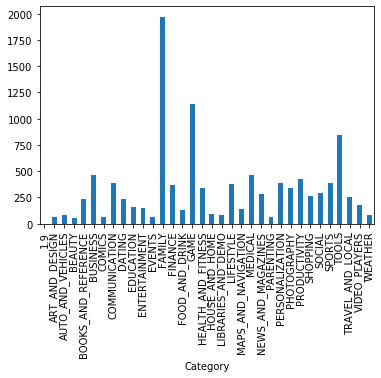

In [32]:
data.groupby('Category')['Reviews'].count().plot(kind='bar')

In [33]:
data[data.App=='Sketch - Draw & Paint']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,RatingState
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Toprating


In [34]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,RatingState
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Toprating
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,down
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Toprating
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Toprating
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Toprating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000.0,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,Toprating
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100.0,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,Toprating
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500000.0,1000.0,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,down
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,Toprating


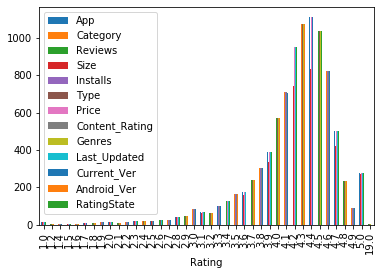

In [35]:
data.groupby('Rating').count().plot(kind='bar')
plt.show()

In [36]:
data.groupby('Price').max()

,App,Category,Rating,Reviews,Size,Installs,Content_Rating,Genres,Last_Updated,RatingState
Price,,,,,,,,,,
$0.99,pretty Easy privacy p≡p,VIDEO_PLAYERS,5.0,9699,100000000.0,1.000000e+07,Teen,Video Players & Editors,"September 3, 2015",down
$1.00,Wi-Fi Rabbit Unlock Key,TOOLS,4.5,552,24000000.0,5.000000e+03,Everyone,Tools,"June 26, 2011",down
$1.04,Word Search Tab 1 FR,FAMILY,NaN,0,1020000.0,5.000000e+01,Everyone,Puzzle,"February 6, 2012",down
$1.20,"sugar, sugar",FAMILY,4.2,1405,9500000.0,1.000000e+04,Everyone,Puzzle,"June 5, 2018",Toprating
$1.26,IF YOU TO EU PEGO,FAMILY,NaN,3,2100000.0,1.000000e+02,Everyone,Entertainment,"January 12, 2012",down
...,...,...,...,...,...,...,...,...,...,...
$89.99,Lean EQ,BUSINESS,NaN,6,10000000.0,1.000000e+01,Everyone,Business,"February 14, 2017",down
$9.00,Monash Uni Low FODMAP Diet,MEDICAL,4.2,1135,12000000.0,1.000000e+05,Everyone,Medical,"July 16, 2018",Toprating
$9.99,XCOM®: Enemy Within,PHOTOGRAPHY,4.8,881,85000000.0,1.000000e+05,Teen,Strategy,"October 5, 2016",down


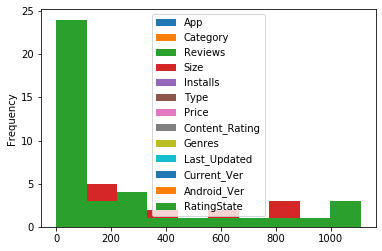

In [37]:
data.groupby('Rating').count().plot(kind='hist')
plt.show()

In [39]:
data.Android_Ver.unique()


array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [40]:
data['Version_begin']=data.Android_Ver.apply(lambda x:str(x).split(' and ')[0].split(' - ')[0])
data.Version_begin=data.Version_begin.replace('4.4W','4.4')
data['Version_end']=data.Android_Ver.apply(lambda x:str(x).split(' and ')[-1].split(' - ')[-1])

In [41]:
data.Version_begin.unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3',
       'Varies with device', '2.2', '5.0', '6.0', '1.6', '1.5', '2.1',
       '7.0', '5.1', '4.3', '2.0', '3.2', '7.1', '8.0', '3.1', '2.0.1',
       'nan', '1.0'], dtype=object)

Text(0.5, 1.0, 'Number of Apps installed based on Content rating')

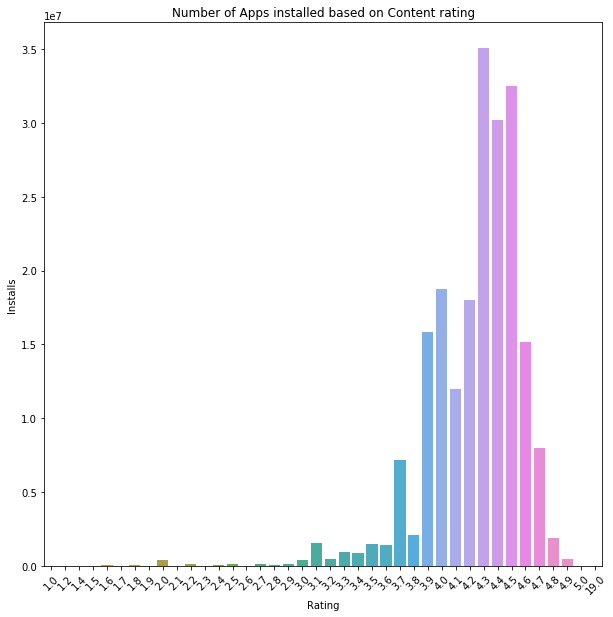

In [43]:
plt.figure(figsize=(10,10))
sns.barplot(x='Rating',y='Installs',data=data,ci=None)
plt.xticks(rotation=45)
plt.title("Number of Apps installed based on Content rating")

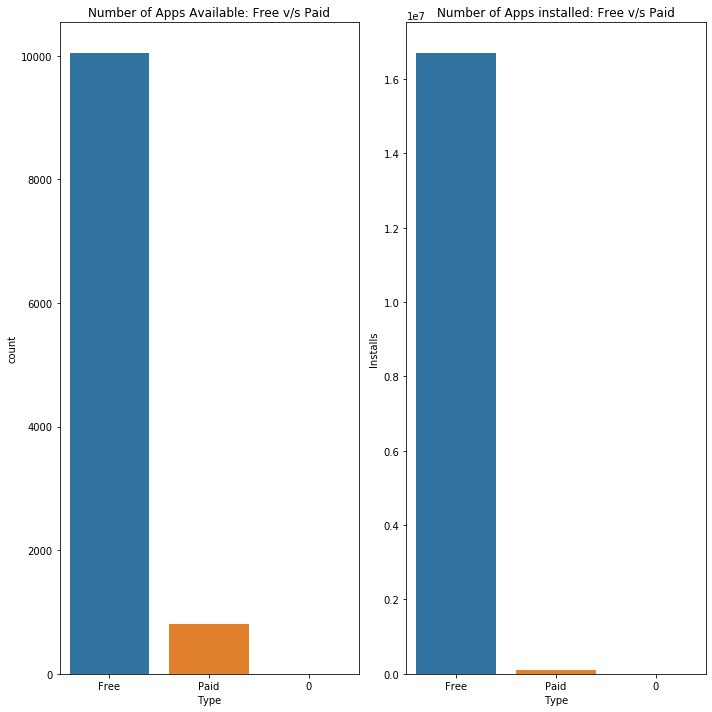

In [44]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.countplot(x='Type',data=data)
plt.title("Number of Apps Available: Free v/s Paid")
plt.subplot(1,2,2)
sns.barplot(x='Type',y='Installs',data=data,ci=None)
plt.title("Number of Apps installed: Free v/s Paid")
plt.tight_layout()